In [54]:
%matplotlib inline
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta
import netCDF4 as nc
import cmocean
import matplotlib.pyplot as plt

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [55]:
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [56]:
path_runs = '/home/jvalenti/MOAD/results/Graham/'
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
restart = 0
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])
jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [57]:
ds = xr.open_dataset('/home/jvalenti/MOAD/results/Graham/Run_Agosto20190801_.nc', decode_times=False)

In [58]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

In [59]:
sys.path.append('/home/jvalenti/MOAD/tools')

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

In [60]:
conc01 = np.load(path_runs+'Runs_alpha0120190101_.npy')
conc = np.load(path_runs+'Run_Enero20190101_.nc.npy')
conc2 = np.load(path_runs+'Run_Febrero20190201_.nc.npy')
conc3 = np.load(path_runs+'Run_Marzo20190301_.nc.npy')
conc_winter = (conc + conc2 + conc3)/3

conc = np.load(path_runs+'Run_Junio20190601_.nc.npy')
conc2 = np.load(path_runs+'Run_Julio20190701_.nc.npy')
conc3 = np.load(path_runs+'Run_Agosto20190801_.nc.npy')
conc_summer = (conc + conc2 + conc3)/3

In [61]:
def artificial_hr(var,Ni,mask):    
    new_conc = np.zeros_like(mask.tmask[0,...],dtype='f')
    for i in range(new_conc.shape[1]):
        for j in range(new_conc.shape[2]):
            new_conc[:,i,j]=var[:,int(i/Ni),int(j/Ni)]
    return new_conc

new_conc = artificial_hr(conc_winter,3,mask)

In [62]:
conc1 = np.load(path_runs+'alpha_1_jan.npy')

In [108]:
iistart,jjstart = finder(47.33468910000697, -122.43406932349323)
iiend,jjend = finder(50.11953151198396, -125.32982172777444)

In [135]:
jj = [jjstart]
ii = [iistart]
for i in range(iistart+1,iiend,1):
    X = np.argsort(mask.totaldepth[i,:])[::-1]
    jj.append(X[np.where(np.abs(X-jj[-1])<10)[0][0]].item())
    ii.append(i)        
file1 = open("mythalweg.txt", "w") 
for i,it in enumerate(ii):
    file1.write(str(it)+' '+str(jj[i])+'\n')
file1.close() 

In [152]:
jj = [jjend]
ii = [iiend]
for i in range(iiend-1,iistart,-1):
    X = np.argsort(mask.totaldepth[i,:])[::-1]
    jj.append(X[np.where(np.abs(X-jj[-1])<20)[0][0]].item())
    ii.append(i)        
file1 = open("mythalweg_reverse.txt", "w") 
for i,it in enumerate(ii):
    file1.write(str(it)+' '+str(jj[i])+'\n')
file1.close() 

In [159]:
levels = np.linspace(0, 2, 15)
fmesh = nc.Dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')
fbathy=nc.Dataset('/home/jvalenti/MOAD/grid/bathymetry_201702.nc')
bathy = fbathy.variables['Bathymetry'][:,:]
thalweg = np.loadtxt('mythalweg.txt', delimiter=' ', dtype=int)
thalweg_r = np.loadtxt('mythalweg_reverse.txt', delimiter=' ', dtype=int)

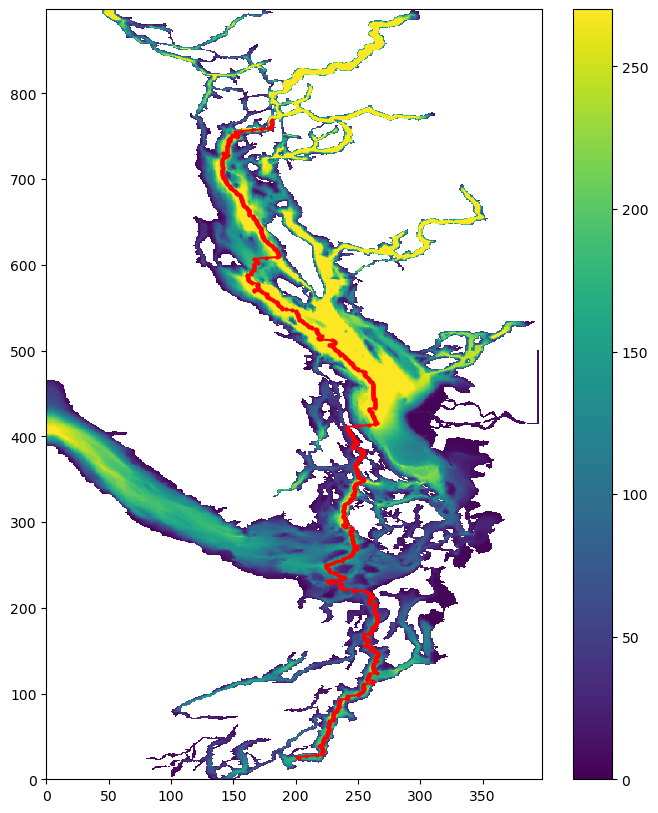

In [160]:
fig,ax = plt.subplots(1,1,figsize=(8,10))
cmin=0; cmax=270;
ps=ax.pcolormesh(bathy,vmin=cmin,vmax=cmax,cmap='viridis') # This will have to be changed in orderto get a clearer view of the Puget thalweg.
fig.colorbar(ps)

ax.plot(thalweg[:,1]+1,thalweg[:,0]+1,marker='o',color='r',markersize=2)

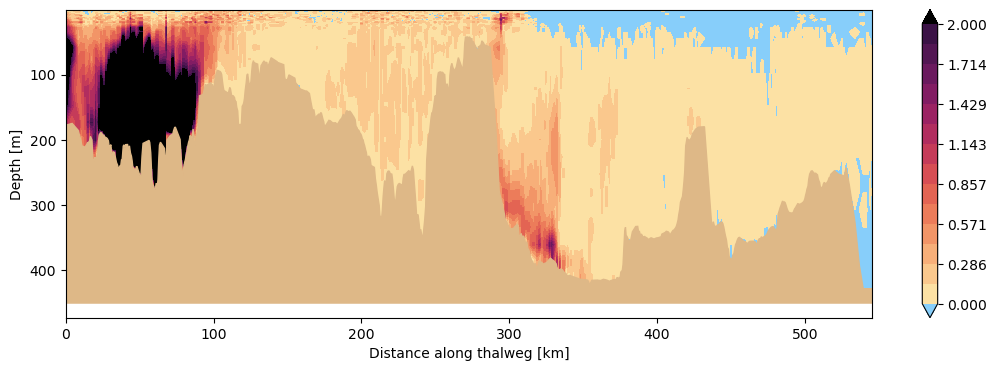

In [162]:
fig,ax=plt.subplots(1,1,figsize=(13,4))
cb=vis.contour_thalweg(ax,artificial_hr(conc01,3,mask),fbathy,fmesh,clevels=levels,cmap=cmocean.cm.matter,thalweg_file='mythalweg.txt')
cb.cmap.set_over('black')
cb.cmap.set_under('lightskyblue')